In [97]:
#Looping graph 

from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph,START,END
import random

In [98]:
class AgentState(TypedDict):
    name : str
    number : list[int]
    counter : int

In [99]:
def greeting_node(state: AgentState)->AgentState:
    """Greeting node which says hi"""
    state['name'] = f"Hello there, {state['name']}"
    state['counter'] = 0
    state['number'] = []
    return state

def random_node(state: AgentState)->AgentState:
    """This is used to generate a number from 0 to 10""" 
    state['number'].append(random.randint(0,10))
    state['counter'] +=1
    return state

def should_continue(state: AgentState)->AgentState:
    """This is the function used to create and continue the loop""" 
    if state['counter'] < 5:
        print("Entering the Loop",state['counter'])
        return "loop_edge"  #We are returning the edge
    else:
        return "exit_edge" #We are returning the edge  


In [100]:
graph=StateGraph(AgentState)
graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)

graph.add_edge(START,"greeting")

graph.add_edge("greeting","random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop_edge":"random",
        "exit_edge":END
    }
)

app=graph.compile()




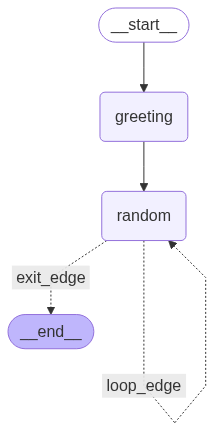

In [101]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [102]:
result = app.invoke({'name':"Rohan"})
print(result)

Entering the Loop 1
Entering the Loop 2
Entering the Loop 3
Entering the Loop 4
{'name': 'Hello there, Rohan', 'number': [2, 5, 5, 2, 7], 'counter': 5}


Exercise-5:
Your task:

Make the graph on the right! You need to implement an Automatic Higher or Lower Game.

Set the bounds to between 1 to 20. The Graph has to keep guessing (max number of guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until we hit the max limit of 7.

Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.

{"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20}


In [103]:
class AgentGameState(TypedDict):
    player_name: str
    guesses: list[int]
    guess_input: int 
    attempts: int
    random_number: int

In [104]:
def setup(state:AgentGameState)->AgentGameState:
    state['guesses'] = []
    state['guess_input'] = 0
    state['attempts'] = 0
    state['random_number'] = random.randint(0,20)
    return state

def guess(state: AgentGameState) -> AgentGameState:
    print(f"\nHello {state['player_name']}, this is guess number {state['attempts'] + 1}")
    
    state['guess_input'] = int(input("Enter your guess (0-20): "))

    state['guesses'].append(state['guess_input'])
    state['attempts'] += 1

    if state['guess_input'] > state['random_number']:
        print("Too high! Try guessing lower.")
    elif state['guess_input'] < state['random_number']:
        print("Too low! Try guessing higher.")
    else:
        print(f"Congratulations {state['player_name']}! You guessed the number in {state['attempts']} attempts.")

    return state

def evaluate_guess(state: AgentGameState) -> str:
    if state['guess_input'] == state['random_number']:
        return "exit_edge"
    elif state['attempts'] >= 7:
        print(f"Sorry {state['player_name']}, you've run out of attempts. The number was {state['random_number']}.")
        return "exit_edge"
    else:
        return "loop_edge"

In [105]:
graph=StateGraph(AgentGameState)
graph.add_node("setup_node",setup)
graph.add_node("guess_node",guess)
graph.add_edge(START,"setup_node")
graph.add_edge("setup_node",'guess_node')

graph.add_conditional_edges(
    "guess_node",
    evaluate_guess,
    {
        "loop_edge":"guess_node",
        "exit_edge":END
    }
)

app=graph.compile()



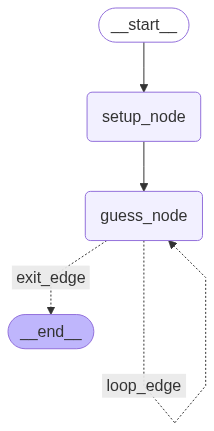

In [106]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [107]:
result=app.invoke({'player_name':"rohan"})
print(result)


Hello rohan, this is guess number 1
Too low! Try guessing higher.

Hello rohan, this is guess number 2
Too low! Try guessing higher.

Hello rohan, this is guess number 3
Too low! Try guessing higher.

Hello rohan, this is guess number 4
Too low! Try guessing higher.

Hello rohan, this is guess number 5
Too low! Try guessing higher.

Hello rohan, this is guess number 6
Too low! Try guessing higher.

Hello rohan, this is guess number 7
Too low! Try guessing higher.
Sorry rohan, you've run out of attempts. The number was 16.
{'player_name': 'rohan', 'guesses': [2, 3, 4, 5, 6, 7, 8], 'guess_input': 8, 'attempts': 7, 'random_number': 16}
